In [1]:
%matplotlib notebook
import numpy as np
import itertools
import logging

from config import CFG
from dataset import load_and_prepare_data
from kde_classes import Model, KDE

from models.multi_gaussian import settings, grid

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

from numpy.lib import recfunctions as np_rfn

# Logging setup utilities
from debugging import (
    setup_logger,
    setup_console_handler,
    setup_file_handler
)

Welcome to JupyROOT 6.14/04


In [2]:
setup_logger('KDE', logging.DEBUG)
log_format = '%(asctime)s %(processName)s %(name)s %(levelname)s: '\
             '%(message)s'
setup_console_handler('KDE', logging.DEBUG, log_format)

In [3]:
mc = np.load(CFG['paths']['mg_mc'])
#mc = load_and_prepare_data(CFG['paths']['IC_mc'])
model = Model(mc, settings, weighting=None)

2019-07-09 12:02:43,714 MainProcess KDE.kde_classes.Model INFO: Using ones as weight.


In [4]:
kde = KDE(model)

                   y INFO: Creating 1D phase space in range (-5.000000, 5.000000)
                   x INFO: Creating 1D phase space in range (-5.000000, 5.000000)
        PhspCombined INFO: Creating combined phase space of 2 components
        PhspCombined INFO: Adding component phase space "y", dim=1
        PhspCombined INFO: Adding component phase space "x", dim=1
        PhspCombined INFO: Resulting dimensionality is 2


In [5]:
binned_kernel_density = kde.generate_binned_kd([0.3, 0.1])

 BinnedKernelDensity INFO: Creating binned kernel density over 2D phase space
 BinnedKernelDensity INFO: Map size=10000
 BinnedKernelDensity INFO: Using variable "weight" as weight
 BinnedKernelDensity INFO: Will read 10000 events (skipping first 0)
 BinnedKernelDensity INFO: Will read branch "y" from tree "tree"
 BinnedKernelDensity INFO: Will read branch "x" from tree "tree"
 BinnedKernelDensity INFO: Will read branch "weight" from tree "tree"
 BinnedKernelDensity INFO: 9841 events read in from "tree", 159 out
 BinnedKernelDensity INFO: Will use uniform density for approximation
 BinnedKernelDensity INFO: Convolution of approx. density using rectangular grid
 BinnedKernelDensity INFO: Normalising density
 BinnedKernelDensity INFO: Average PDF value before normalisation is 1.175477


In [6]:
out_bins = []
for key in settings:
    out_bins.append(np.linspace(settings[key]['range'][0],
                                settings[key]['range'][1],
                                settings[key]['nbins']))
coords = np.array(list(itertools.product(*out_bins)))

In [7]:
print('Evaluate KDEs:')
pdf_vals = np.asarray([kde.eval_point(binned_kernel_density, coord) for coord in coords])
pdf_vals = pdf_vals.reshape(model.nbins)

Evaluate KDEs:
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=-0.00

In [8]:
X, Y = np.meshgrid(*out_bins)

<IPython.core.display.Javascript object>


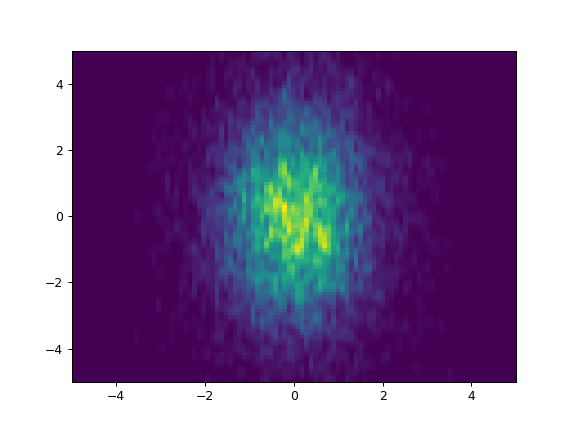

In [9]:
plt.figure()

plt.pcolormesh(X, Y, pdf_vals)

<IPython.core.display.Javascript object>


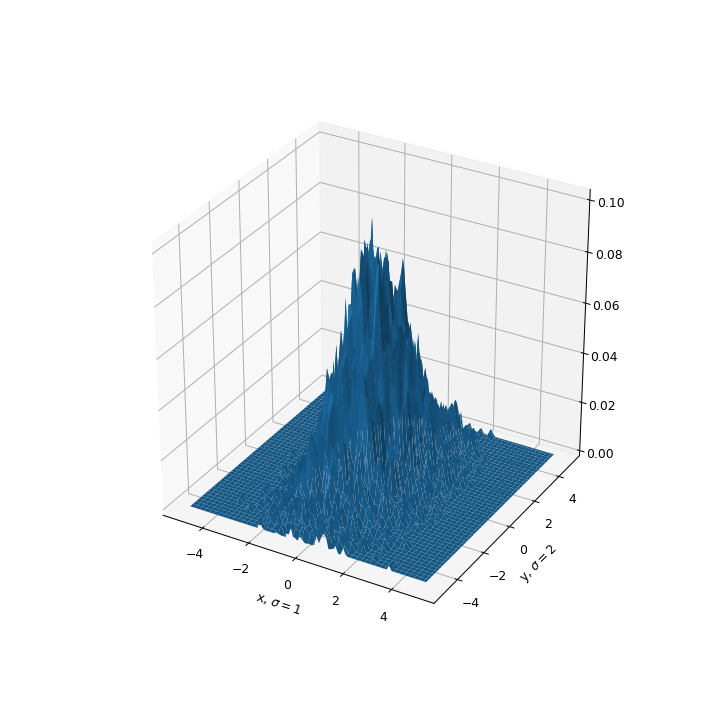

Text(0.5,0,'y, $\\sigma=2$')

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, pdf_vals)
ax.set_xlabel('x, $\sigma=1$')
ax.set_ylabel('y, $\sigma=2$')

Generate adaptive kde

In [ ]:
adaptive_kernel_density = kde.generate_adaptive_kd([0.5, 0.5])

In [ ]:
nbins = 100

print('Evaluate KDEs:')
adaptive_pdf_vals = np.asarray([kde.eval_point(adaptive_kernel_density, coord) for coord in coords])
adaptive_pdf_vals = adaptive_pdf_vals.reshape(model.nbins)

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, adaptive_pdf_vals)
ax.set_xlabel('x, $\sigma=1$')
ax.set_ylabel('y, $\sigma=2$')

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
h = ax.hist2d(mc['x'], mc['y'], bins=[100, 100], range=[[-5, 5], [-5, 5]])
fig.colorbar(h[3], ax=ax)


In [5]:
cv_result = kde.cross_validate([0.5, 0.5], adaptive=False)

                   y INFO: Creating 1D phase space in range (-5.000000, 5.000000)
                   x INFO: Creating 1D phase space in range (-5.000000, 5.000000)
        PhspCombined INFO: Creating combined phase space of 2 components
        PhspCombined INFO: Adding component phase space "y", dim=1
        PhspCombined INFO: Adding component phase space "x", dim=1
        PhspCombined INFO: Resulting dimensionality is 2
 BinnedKernelDensity INFO: Creating binned kernel density over 2D phase space
 BinnedKernelDensity INFO: Map size=10000
 BinnedKernelDensity INFO: Using variable "weight" as weight
 BinnedKernelDensity INFO: Will read 8000 events (skipping first 0)
 BinnedKernelDensity INFO: Will read branch "y" from tree "tree"
 BinnedKernelDensity INFO: Will read branch "x" from tree "tree"
 BinnedKernelDensity INFO: Will read branch "weight" from tree "tree"
 BinnedKernelDensity INFO: 7865 events read in from "tree", 135 out
 BinnedKernelDensity INFO: Will use uniform density for

In [6]:
cv_result

array([(0.5, 0.5, -3.3874357, 0.)],
      dtype=[('y_bandwidth', '<f4'), ('x_bandwidth', '<f4'), ('LLH', '<f4'), ('Zeros', '<f4')])

In [7]:
result = kde.cross_validate_bandwidths(adaptive=False)

2019-07-09 11:57:20,465 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.1)
2019-07-09 11:57:22,560 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.2)
2019-07-09 11:57:24,428 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.30000000000000004)
2019-07-09 11:57:26,307 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.4)
2019-07-09 11:57:28,221 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.5)
2019-07-09 11:57:30,157 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.6)
2019-07-09 11:57:32,204 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.7000000000000001)
2019-07-09 11:57:34,497 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.8)
2019-07-09 11:57:36,949 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.9)
2019-07-09 11:57:39,156 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 1.0)
2019-07-09 11:57:41,354 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.4, 0.1)
2019-07-09 11:57:43,234 MainProcess KDE.kde_c

In [8]:
result

array([(0.3, 0.1, -3.4024968, 0.), (0.3, 0.2, -3.3981934, 0.),
       (0.3, 0.3, -3.3909926, 0.), (0.3, 0.4, -3.3934274, 0.),
       (0.3, 0.5, -3.3871055, 0.), (0.3, 0.6, -3.3875337, 0.),
       (0.3, 0.7, -3.3863368, 0.), (0.3, 0.8, -3.3922558, 0.),
       (0.3, 0.9, -3.3917577, 0.), (0.3, 1. , -3.39248  , 0.),
       (0.4, 0.1, -3.3938007, 0.), (0.4, 0.2, -3.3906026, 0.),
       (0.4, 0.3, -3.3841054, 0.), (0.4, 0.4, -3.3895874, 0.),
       (0.4, 0.5, -3.3873773, 0.), (0.4, 0.6, -3.3871803, 0.),
       (0.4, 0.7, -3.3894598, 0.), (0.4, 0.8, -3.3900905, 0.),
       (0.4, 0.9, -3.3913443, 0.), (0.4, 1. , -3.3922334, 0.),
       (0.5, 0.1, -3.3950036, 0.), (0.5, 0.2, -3.3869352, 0.),
       (0.5, 0.3, -3.382863 , 0.), (0.5, 0.4, -3.3926516, 0.),
       (0.5, 0.5, -3.3874357, 0.), (0.5, 0.6, -3.3879516, 0.),
       (0.5, 0.7, -3.3874185, 0.), (0.5, 0.8, -3.3897758, 0.),
       (0.5, 0.9, -3.3900177, 0.), (0.5, 1. , -3.391175 , 0.),
       (0.6, 0.1, -3.3912046, 0.), (0.6, 0.2, -3.386011

In [11]:
result[result['LLH'] == np.max(result['LLH'])]

array([(0.5, 0.3, -3.382863, 0.)],
      dtype=[('y_bandwidth', '<f4'), ('x_bandwidth', '<f4'), ('LLH', '<f4'), ('Zeros', '<f4')])